### Theoretical cluster count covariances using TJPCov.
This notebook shows how to use TJPCov to calculate covariances, given a .sacc file.

We will
1. Read in an appropriate yaml file that specifies to do cluster count covariances
2. Instantiate a `CovarianceCalculator` 
3. Tell the calculator to calculate the covariances
4. Display the covariance / correlation coefficient
5. Save the covariance back to .sacc

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tjpcov.covariance_calculator import CovarianceCalculator
 

The .yaml file contains the reference to the .sacc file - so specify which .sacc file you want to use there. You can also specify if you want to use MPI or not.

In [2]:
input_yml = './clusters/conf_covariance_clusters.yaml'
cc = CovarianceCalculator(input_yml)

All we need to do is call `get_covariance` to calculate the covariance of all classes specified in the yaml file.  For this example we are calculating the cluster count covariance SSC and Gaussian contributions.

Then, we call `create_sacc_cov` to the covariance to the sacc file.

In [3]:
cov = cc.get_covariance()
sacc_with_cov = cc.create_sacc_cov(output='mock_clusters_with_cov.sacc', save_terms=False)

Computing independent covariance blocks
('clusters_0_0',) ('clusters_0_0',)
('clusters_0_0',) ('clusters_0_1',)
('clusters_0_0',) ('clusters_0_2',)
('clusters_0_0',) ('clusters_0_3',)
('clusters_0_0',) ('clusters_0_4',)
('clusters_0_0',) ('clusters_1_0',)
('clusters_0_0',) ('clusters_1_1',)
('clusters_0_0',) ('clusters_1_2',)
('clusters_0_0',) ('clusters_1_3',)
('clusters_0_0',) ('clusters_1_4',)
('clusters_0_0',) ('clusters_2_0',)
('clusters_0_0',) ('clusters_2_1',)
('clusters_0_0',) ('clusters_2_2',)
('clusters_0_0',) ('clusters_2_3',)
('clusters_0_0',) ('clusters_2_4',)
('clusters_0_0',) ('clusters_3_0',)
('clusters_0_0',) ('clusters_3_1',)
('clusters_0_0',) ('clusters_3_2',)
('clusters_0_0',) ('clusters_3_3',)
('clusters_0_0',) ('clusters_3_4',)
('clusters_0_1',) ('clusters_0_1',)
('clusters_0_1',) ('clusters_0_2',)
('clusters_0_1',) ('clusters_0_3',)
('clusters_0_1',) ('clusters_0_4',)
('clusters_0_1',) ('clusters_1_0',)
('clusters_0_1',) ('clusters_1_1',)
('clusters_0_1',) ('clus

/Users/matt/opt/anaconda3/lib/python3.8/site-packages/pyccl/pyutils.py:408: CCLWarning: The function halo_bias is deprecated. Use HaloBias instead.
  warnings.warn(s, CCLWarning)


('clusters_0_0',) ('clusters_0_1',)
('clusters_0_0',) ('clusters_0_2',)
('clusters_0_0',) ('clusters_0_3',)
('clusters_0_0',) ('clusters_0_4',)
('clusters_0_0',) ('clusters_1_0',)
('clusters_0_0',) ('clusters_1_1',)
('clusters_0_0',) ('clusters_1_2',)
('clusters_0_0',) ('clusters_1_3',)
('clusters_0_0',) ('clusters_1_4',)
('clusters_0_0',) ('clusters_2_0',)
('clusters_0_0',) ('clusters_2_1',)
('clusters_0_0',) ('clusters_2_2',)
('clusters_0_0',) ('clusters_2_3',)
('clusters_0_0',) ('clusters_2_4',)
('clusters_0_0',) ('clusters_3_0',)
('clusters_0_0',) ('clusters_3_1',)
('clusters_0_0',) ('clusters_3_2',)
('clusters_0_0',) ('clusters_3_3',)
('clusters_0_0',) ('clusters_3_4',)
('clusters_0_1',) ('clusters_0_1',)
('clusters_0_1',) ('clusters_0_2',)
('clusters_0_1',) ('clusters_0_3',)
('clusters_0_1',) ('clusters_0_4',)
('clusters_0_1',) ('clusters_1_0',)
('clusters_0_1',) ('clusters_1_1',)
('clusters_0_1',) ('clusters_1_2',)
('clusters_0_1',) ('clusters_1_3',)
('clusters_0_1',) ('clusters

Now we can either get the covariance matrix
 from the covariance class directly, or from the SACC file (which we will do below).

In [6]:
cov_from_file = sacc_with_cov.covariance.covmat
def correlation(cov):
    diag = np.diag(cov)
    return cov / np.sqrt(diag[:, None] * diag[None, :])
corr = correlation(cov_from_file)

Below we show the covariance and correlation

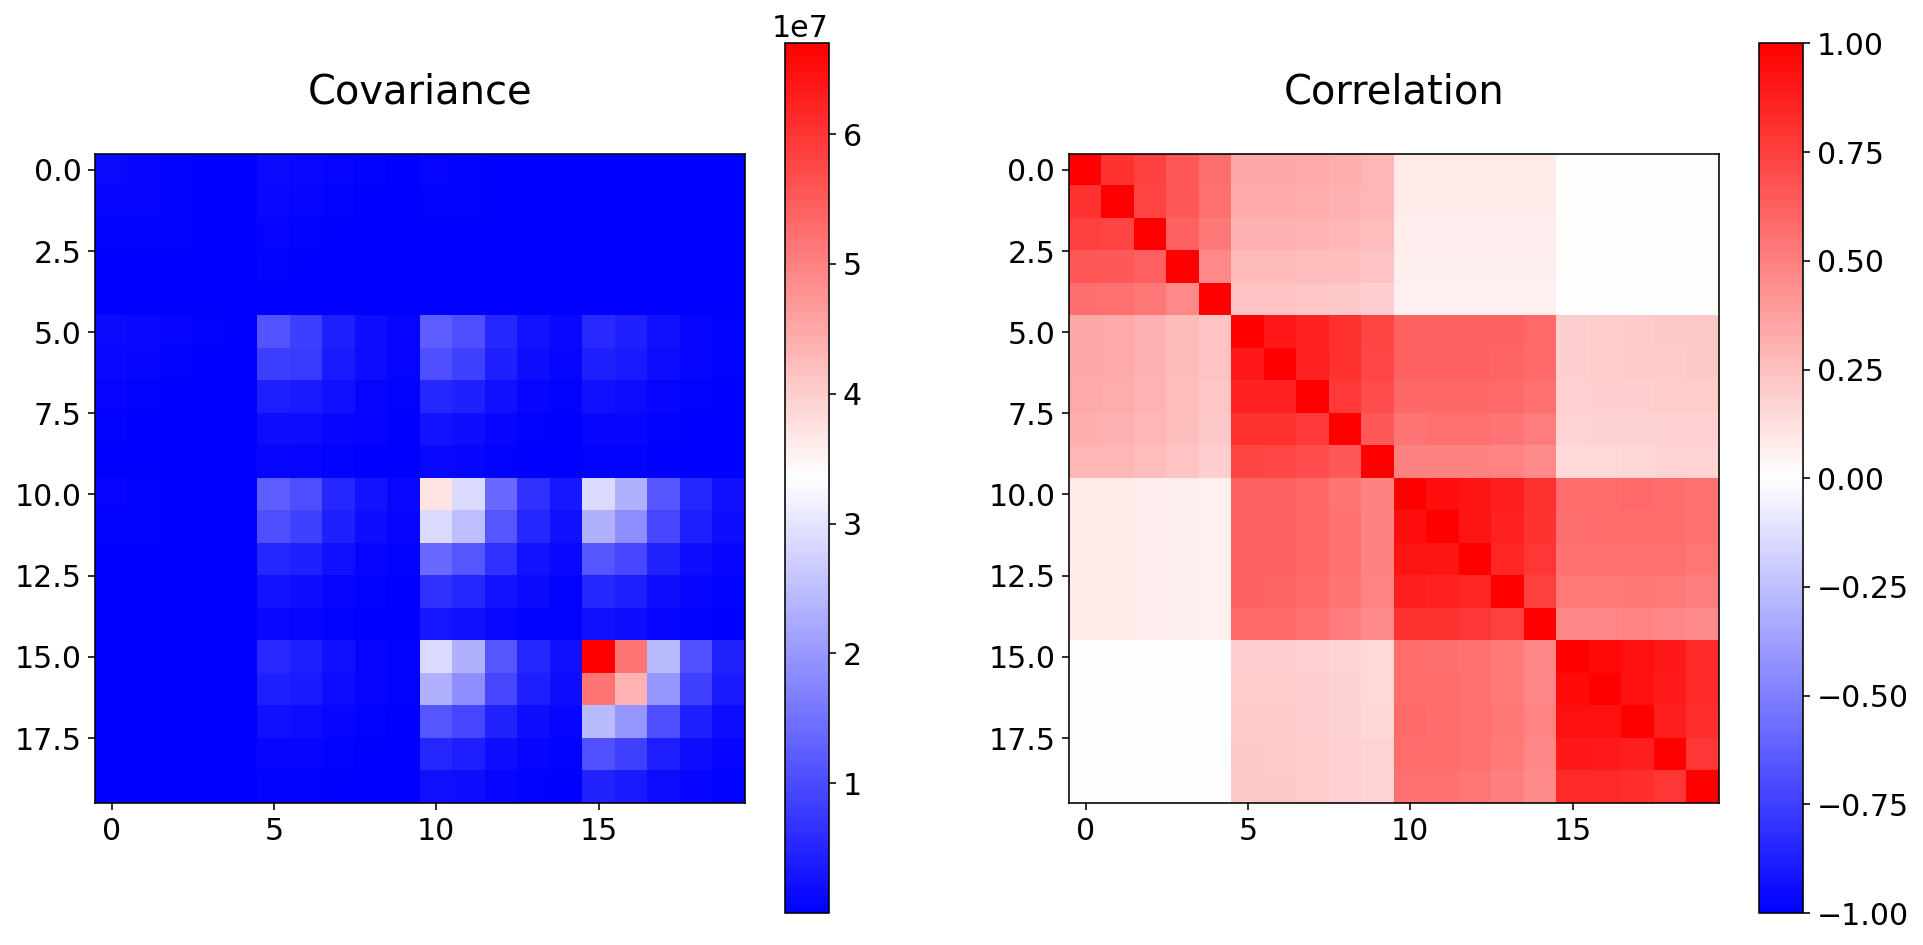

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

im1 = ax1.imshow(cov_from_file, cmap='bwr')
im2 = ax2.imshow(corr, cmap='bwr', vmax=1, vmin=-1)
ax1.set_title('Covariance')
ax2.set_title('Correlation')

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)

We can also show the gaussian and SSC contributions to the covariance independently, shown below

In [8]:
cov_terms = cc.get_covariance_terms()
gaussian = correlation(cov_terms['gauss'])
ssc = correlation(cov_terms['SSC'])

Text(0.5, 0.98, 'Correlation from terms')

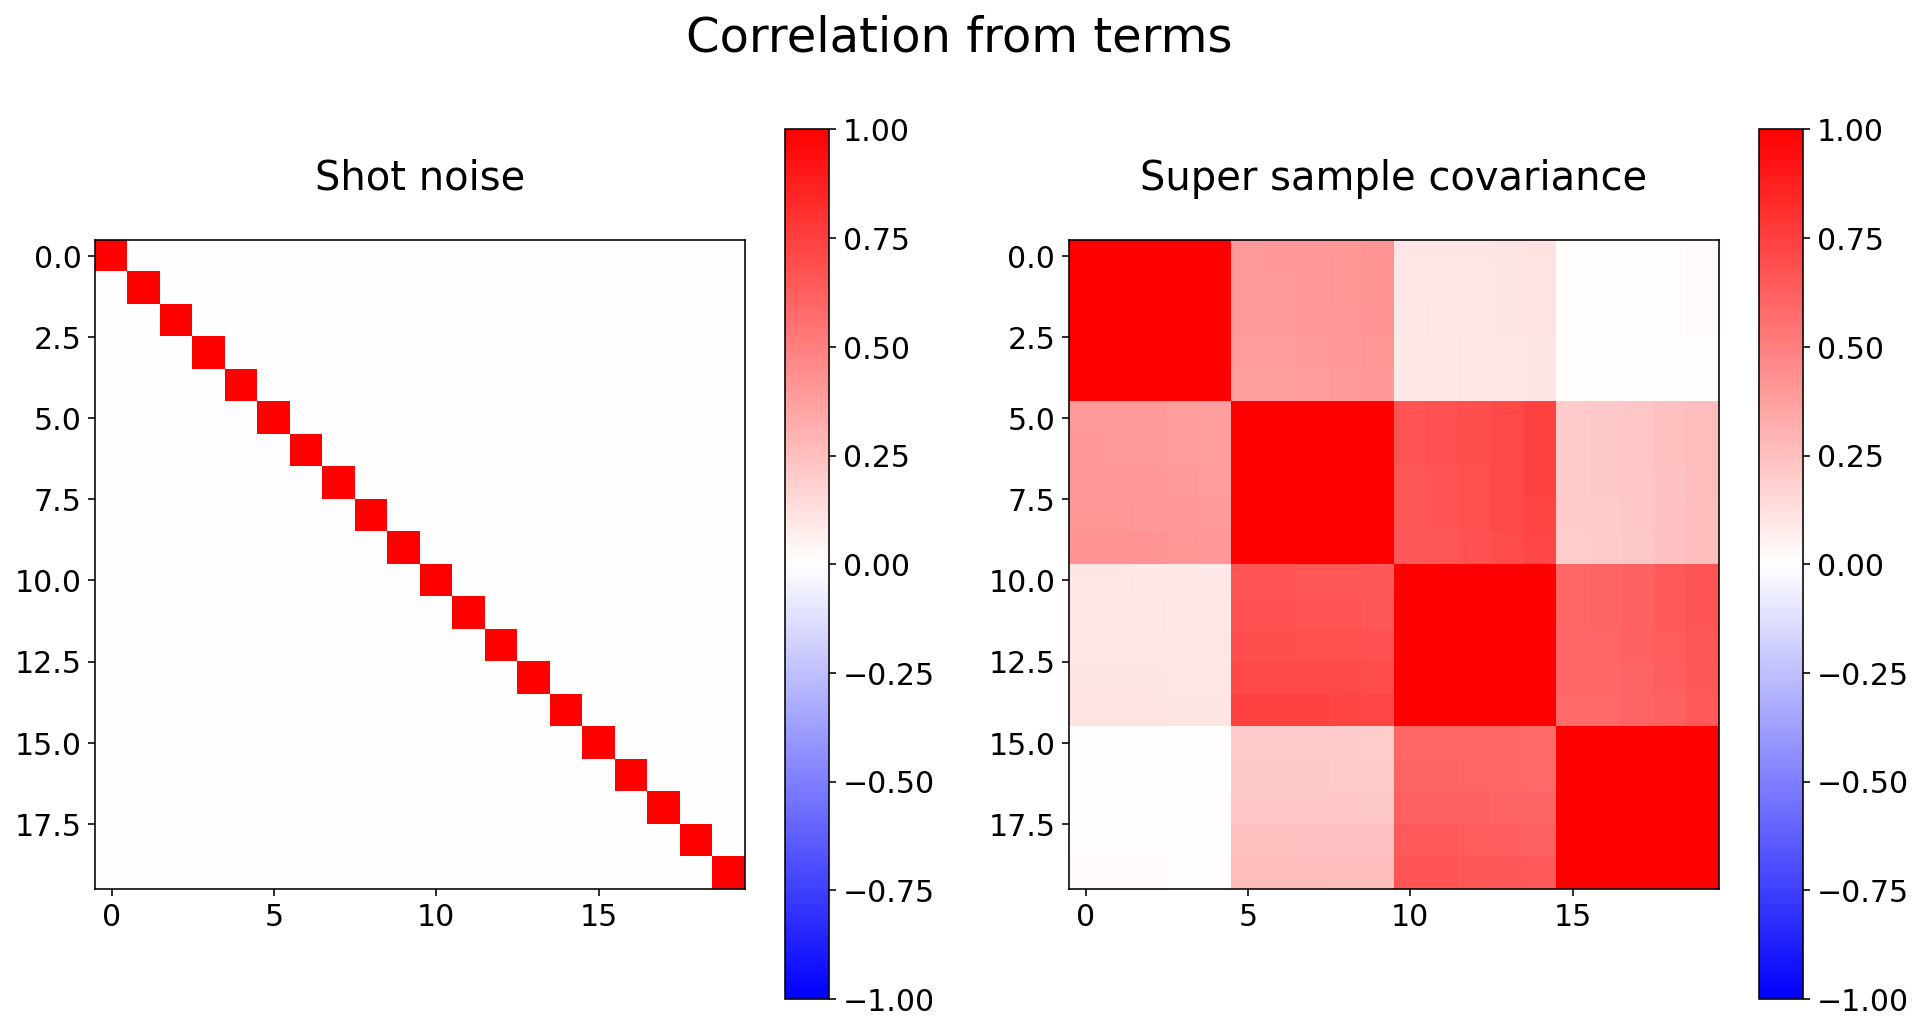

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
im1 = ax1.imshow(gaussian, cmap='bwr', vmax=1, vmin=-1)
im2 = ax2.imshow(ssc, cmap='bwr', vmax=1, vmin=-1)
ax1.set_title('Shot noise')
ax2.set_title('Super sample covariance')

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.suptitle('Correlation from terms', fontsize=24)

Text(0.5, 0.98, 'Covariance from terms')

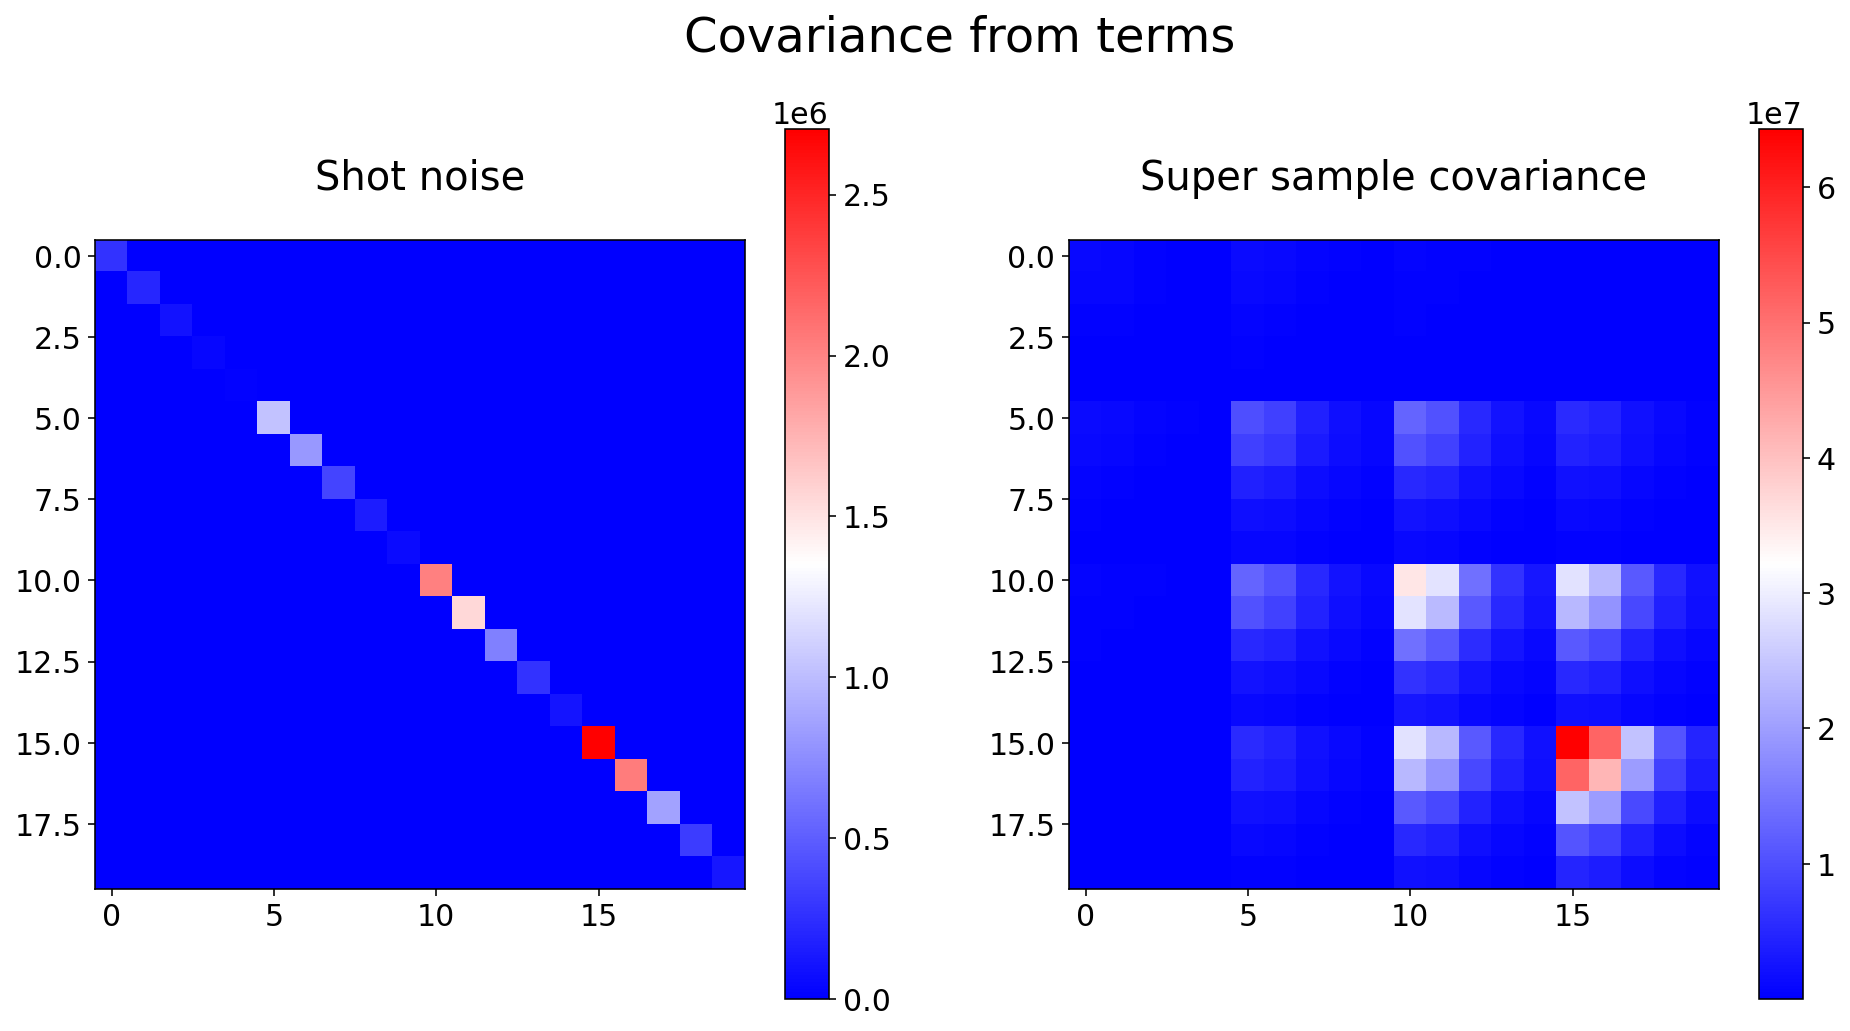

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
im1 = ax1.imshow(cov_terms['gauss'], cmap='bwr')
im2 = ax2.imshow(cov_terms['SSC'], cmap='bwr')
ax1.set_title('Shot noise')
ax2.set_title('Super sample covariance')

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.suptitle('Covariance from terms', fontsize=24)